<a href="https://colab.research.google.com/github/Vishanth2006/SDC-Gen-AI/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.1902
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0291
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0089
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0011
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.6298e-04
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.0445e-04
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 5.1093e-05
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.9831e-05
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.4443e-05
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.5745e-05
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.3430e-05
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.1193e-05
Epoch 13/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.3745e-05
Epoch 14/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.7515e-05
Epoch 15/20
24/24 ━━━━━━━━━━━━━

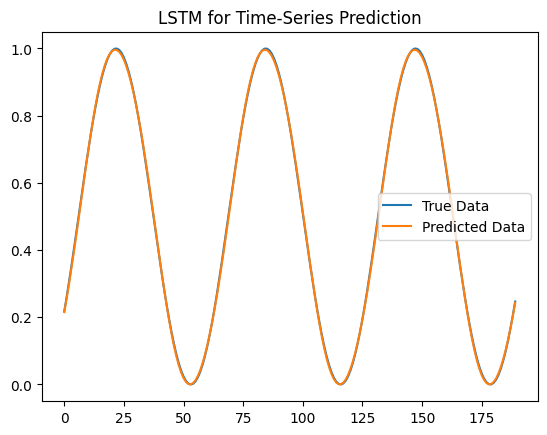

In [1]:
# Importing required libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Generating synthetic time-series data
data = np.sin(np.linspace(0, 100, 1000))  # Sine wave data
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1))

# Creating sequences for training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 50
X, y = create_sequences(data, seq_length)

# Reshaping data to fit LSTM input shape (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Splitting data into training and testing sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Building the LSTM model
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(seq_length, 1)),
    Dense(1)
])

# Compiling the model
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Making predictions
y_pred = model.predict(X_test)

# Visualizing the results
import matplotlib.pyplot as plt
plt.plot(y_test, label='True Data')
plt.plot(y_pred, label='Predicted Data')
plt.legend()
plt.title("LSTM for Time-Series Prediction")
plt.show()
